In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('spam.csv')

In [3]:
data.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
data.describe(include='all')

,label,text
count,10743,10743
unique,2,10072
top,ham,"Sorry, I'll call later"
freq,8497,30


In [5]:
data.isnull().sum()

label    0
text     0
dtype: int64

# Data Cleaning


In [6]:
data.rename(columns={'label':'target'} , inplace=True)

In [7]:
data.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
data.target=lb.fit_transform(data.target)
# ham-->0  spam--->1

In [9]:
data.head(3)

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...


In [10]:
data.duplicated().sum()

671

In [11]:
# remove all the duplicates
data=data.drop_duplicates(keep='first')

# EDA

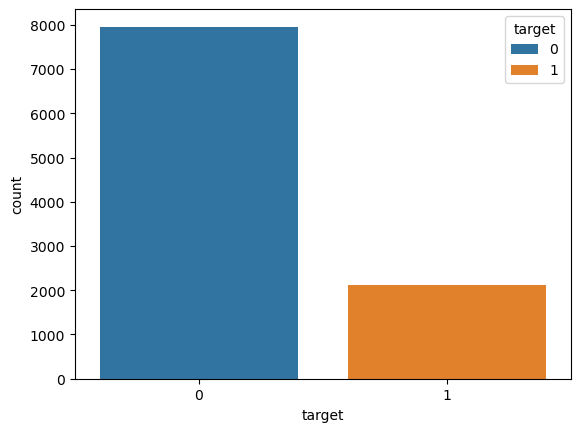

In [12]:
sns.countplot(x=data.target , hue=data.target)
plt.show()

In [13]:
t=data.target.value_counts()

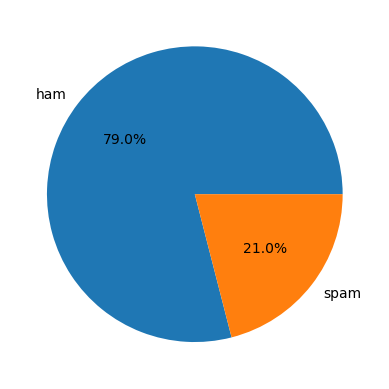

In [14]:
plt.pie(t , labels=['ham','spam'] , autopct='%.001f%%')
plt.show()

In [15]:
import nltk

In [16]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\anime\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [17]:
data['num_characters']=data['text'].apply(lambda x: len(x))

In [18]:
data['num_words']=data['text'].apply(lambda x: len(nltk.word_tokenize(x)))

In [19]:
data['num_sentences']=data['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [20]:
data.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [21]:
data[data.target==0].describe()

,target,num_characters,num_words,num_sentences
count,7957.0,7957.000000,7957.000000,7957.000000
mean,0.0,466.078422,110.205731,6.114616
std,0.0,1023.834817,248.265503,17.590688
min,0.0,2.000000,1.000000,1.000000
25%,0.0,47.000000,12.000000,1.000000
50%,0.0,104.000000,25.000000,2.000000
75%,0.0,420.000000,102.000000,6.000000
max,0.0,31860.000000,8863.000000,1204.000000


In [22]:
 data[data.target==1].describe()

,target,num_characters,num_words,num_sentences
count,2115.0,2115.000000,2115.000000,2115.000000
mean,1.0,891.256738,175.352246,13.050118
std,0.0,1590.079555,306.840487,28.351146
min,1.0,10.000000,2.000000,1.000000
25%,1.0,150.000000,29.000000,3.000000
50%,1.0,325.000000,67.000000,5.000000
75%,1.0,849.500000,174.000000,13.000000
max,1.0,21749.000000,3963.000000,693.000000


(0.0, 10000.0)

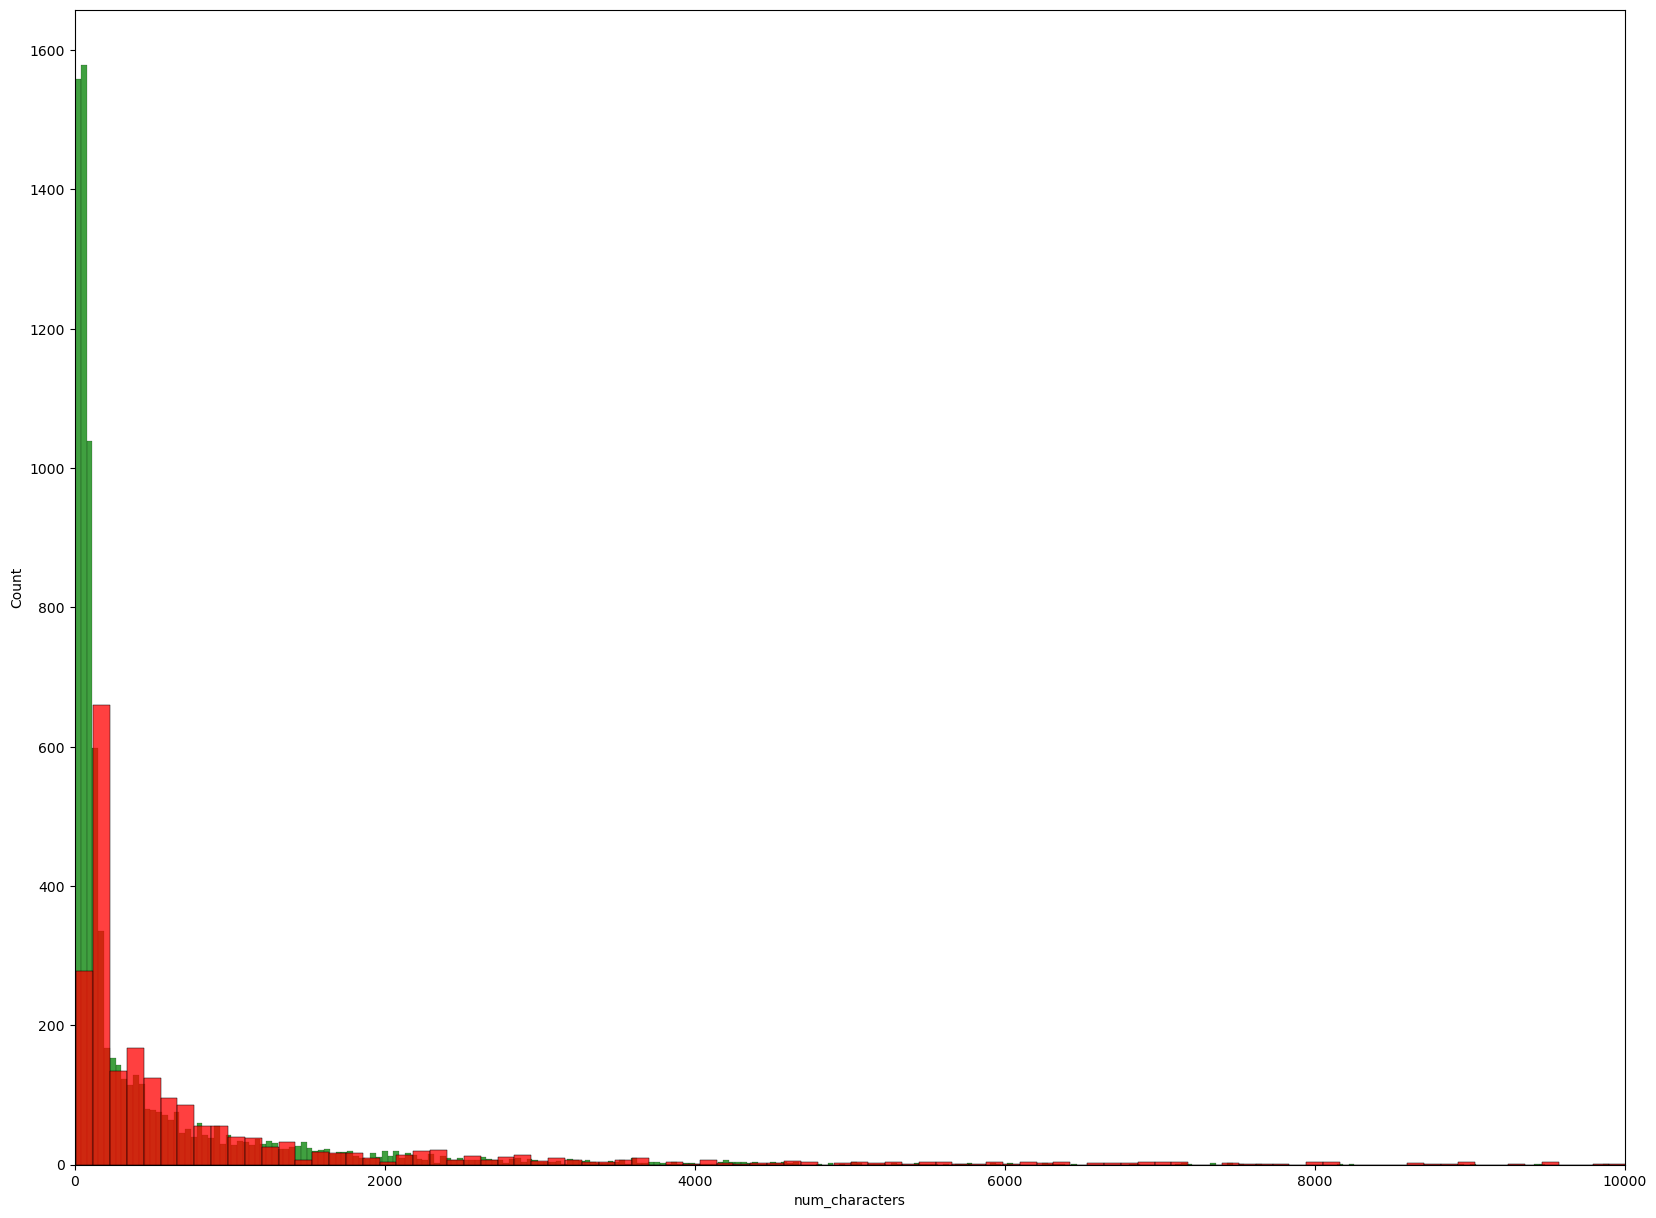

In [23]:
plt.figure(figsize=(20,15))
sns.histplot(data[data.target==0]['num_characters'] , color='green')
sns.histplot(data[data.target==1]['num_characters'] , color='red')
plt.xlim(0, 10000)

(0.0, 1700.0)

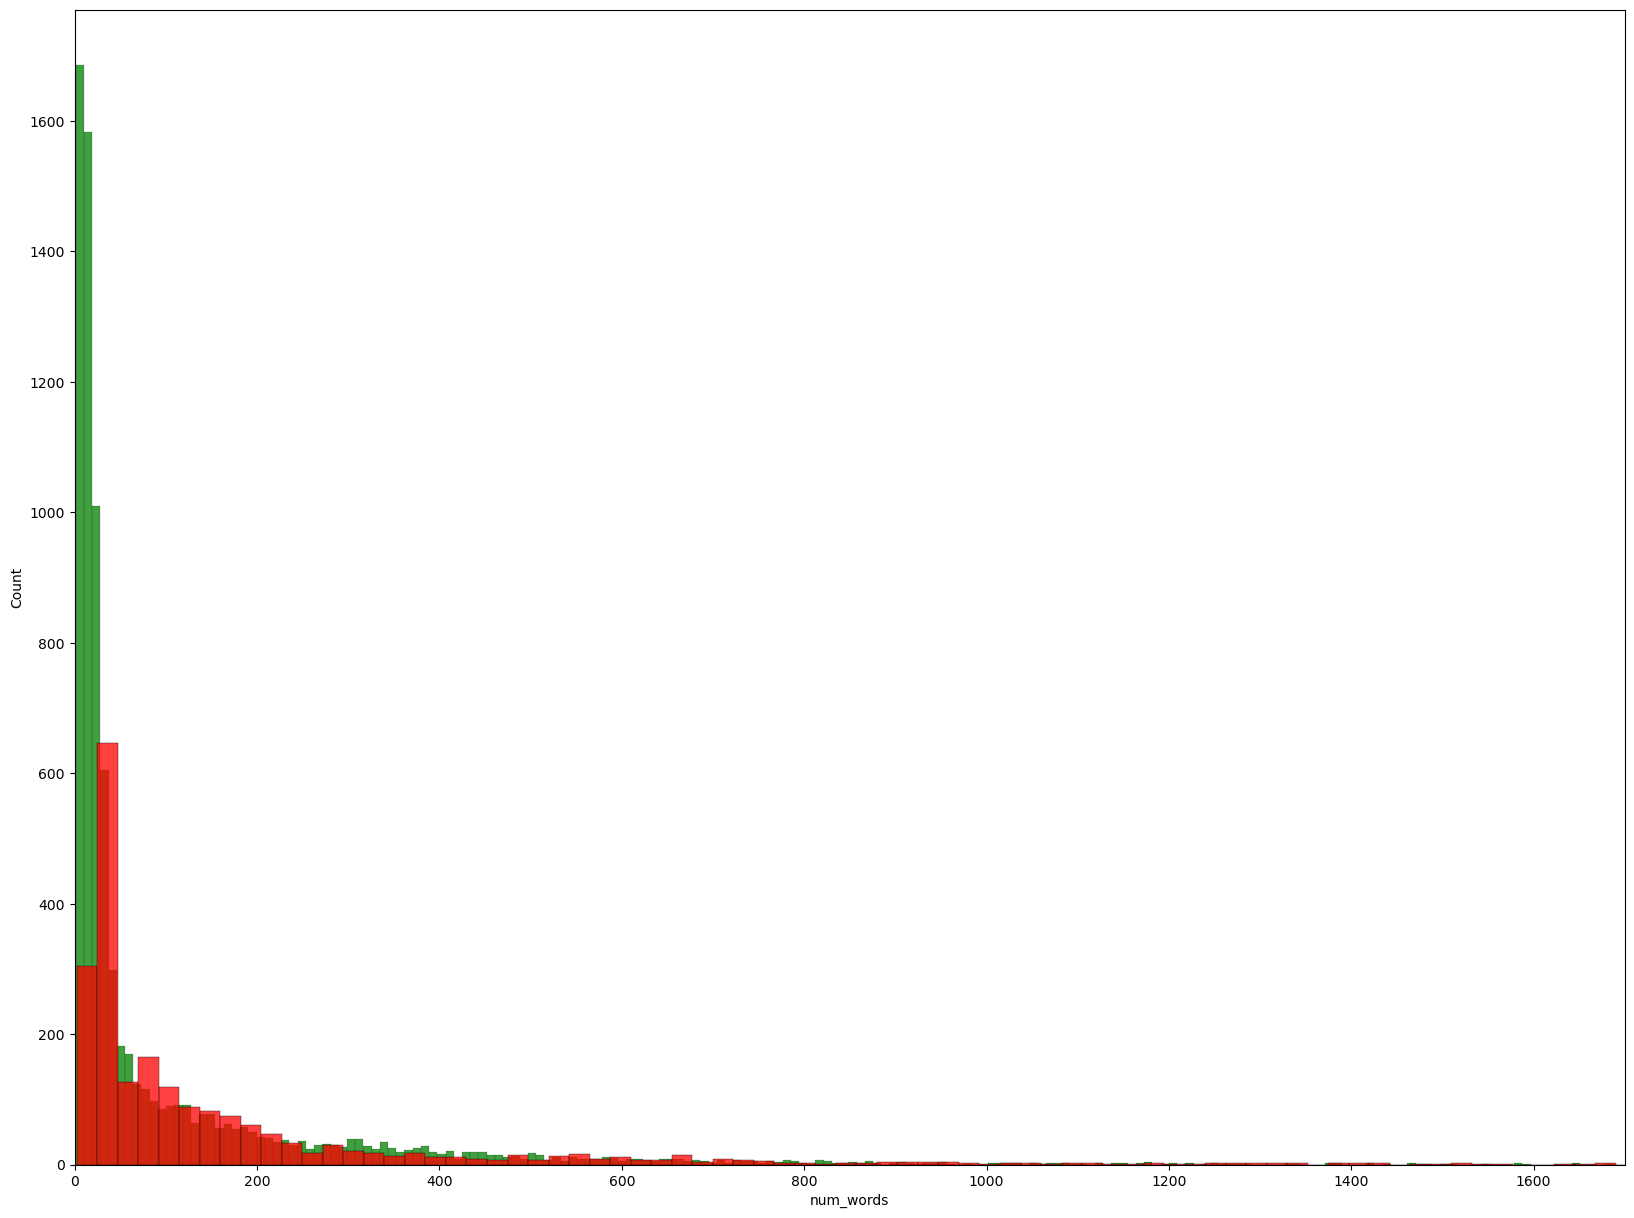

In [24]:
plt.figure(figsize=(20,15))
sns.histplot(data[data.target==0]['num_words'] , color='green')
sns.histplot(data[data.target==1]['num_words'] , color='red')
plt.xlim(0, 1700)

(0.0, 70.0)

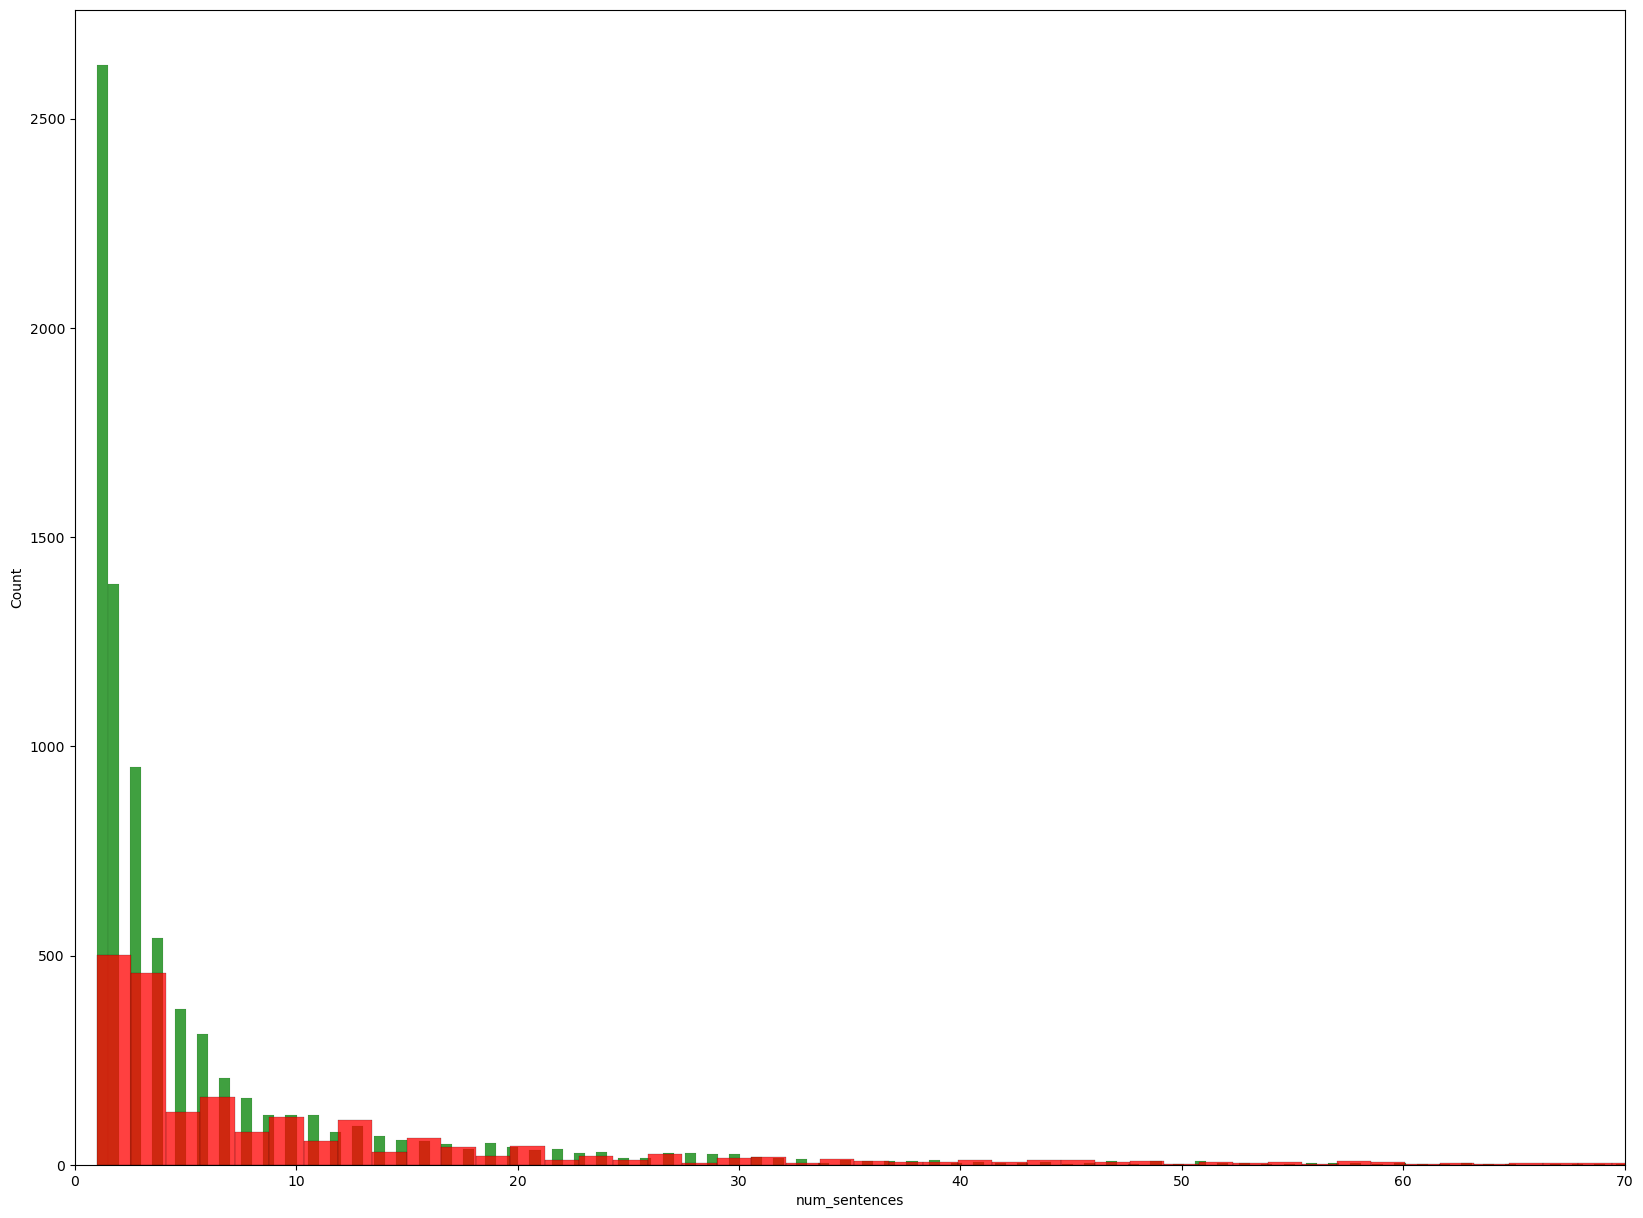

In [25]:
plt.figure(figsize=(20,15))
sns.histplot(data[data.target==0]['num_sentences'] , color='green')
sns.histplot(data[data.target==1]['num_sentences'] , color='red')
plt.xlim(0, 70)

<Figure size 2000x1500 with 0 Axes>

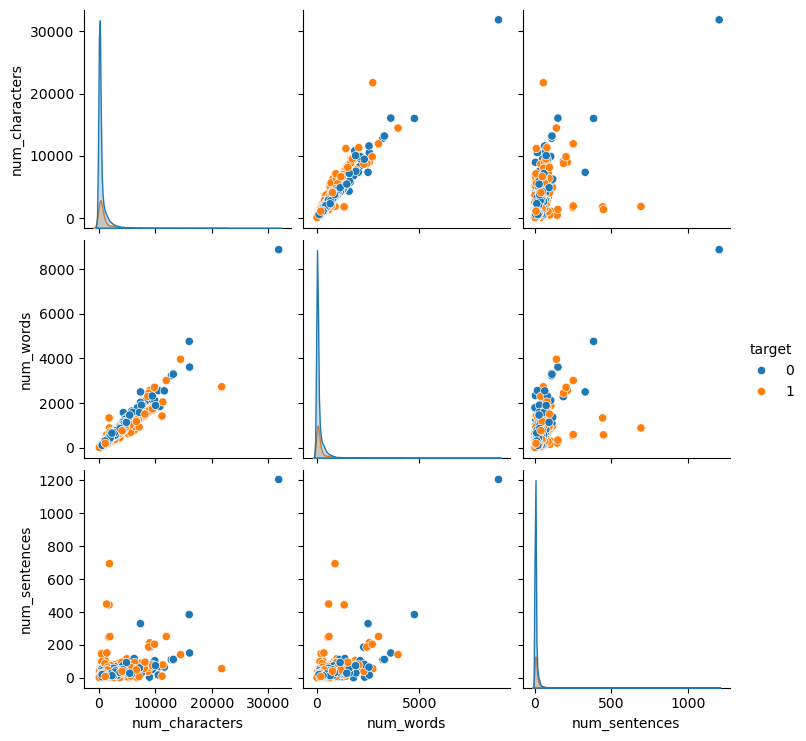

In [26]:
plt.figure(figsize=(20,15))
sns.pairplot(data , hue='target')

In [27]:
d=data[['num_sentences' , 'num_words' , 'num_characters' , 'target']].corr()

<Axes: >

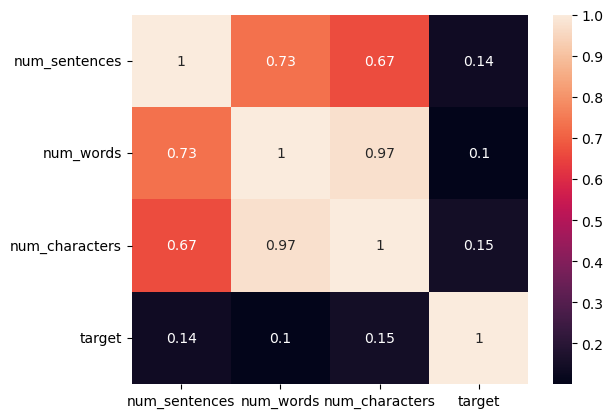

In [28]:
sns.heatmap(d , annot=True)

# Data Preprocessing
## Lower case , tokenization , remove stopwords , stemming

In [29]:
import string
from nltk.corpus import stopwords
s=stopwords.words('english')
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()

def transform_text(text):
    text=text.lower();
    text=nltk.word_tokenize(text)

    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
    ans=[]
    for i in y:
        if i not in s and i not in string.punctuation:
            ans.append(ps.stem(i))
    return " ".join(ans)
    

transform_text('hi brother how are you ')


'hi brother'

In [30]:
data['transformed_text']=data.text.apply(transform_text)

In [31]:
data

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though
...,...,...,...,...,...,...
10736,1,Subject: slutty milf wants to meet you take th...,66,15,2,subject slutti milf want meet take ilaa liqaa
10738,0,Subject: put the 10 on the ft the transport vo...,522,156,7,subject put 10 ft transport volum decreas 2500...
10739,0,Subject: 3 / 4 / 2000 and following noms hpl c...,1094,306,13,subject 3 4 2000 follow nom hpl take extra 15 ...
10741,0,Subject: industrial worksheets for august 2000...,564,112,20,subject industri worksheet august 2000 activ a...


In [32]:
from wordcloud import WordCloud
wc = WordCloud(width=500 , height=500 , min_font_size=20 , background_color='white')

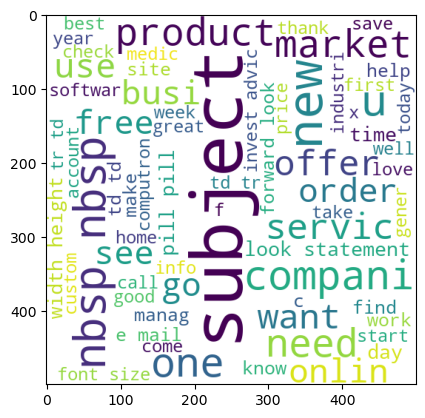

In [33]:
spam_img=wc.generate(data[data.target==1]['transformed_text'].str.cat(sep=" ") )
plt.imshow(spam_img)

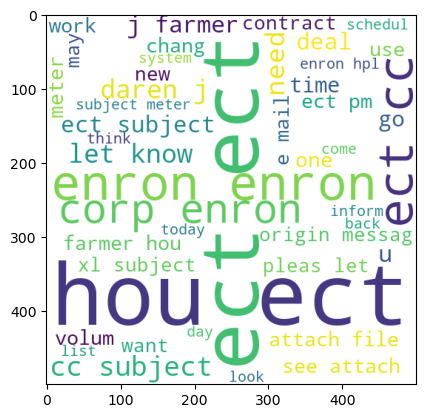

In [34]:
ham_img=wc.generate(data[data.target==0]['transformed_text'].str.cat(sep=" ") )
plt.imshow(spam_img)

In [114]:
 from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv=CountVectorizer(max_features=4000)

In [115]:
x=cv.fit_transform(data.transformed_text).toarray()
y=data.target.values

In [116]:
x=np.hstack((x,data.num_characters.values.reshape(-1,1)))

In [117]:
print(x.shape)
print(y.shape)

(10072, 4001)
(10072,)


In [118]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.3 , random_state=2)

In [119]:
from sklearn.metrics import accuracy_score , precision_score , confusion_matrix , recall_score
# from sklearn.naive_bayes import GaussianNB , MultinomialNB , BernoulliNB

In [120]:

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import (
    RandomForestClassifier,
    AdaBoostClassifier,
    BaggingClassifier,
    GradientBoostingClassifier,
    ExtraTreesClassifier
)
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB




lr = LogisticRegression(solver='liblinear' ,penalty='l1' , class_weight='balanced')
lr2=LogisticRegression(solver='liblinear' ,penalty='l2' , class_weight='balanced')
svc = SVC(kernel='sigmoid' , gamma=1)
dt = DecisionTreeClassifier(max_depth=8)
knn = KNeighborsClassifier(n_neighbors=8)
rf = RandomForestClassifier(n_estimators=50 , random_state=2)
adb = AdaBoostClassifier(n_estimators=50 , random_state=2)
bag = BaggingClassifier(n_estimators=50 , random_state=2)
gb = GradientBoostingClassifier(n_estimators=50 , random_state=2)
etc=ExtraTreesClassifier()
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [121]:
# l=[lr,dt,knn,rf,adb,bag,gb]

In [122]:
def test_model(model , x_train=x_train , x_test=x_test , y_trin=y_train , y_test=y_test):
    model.fit(x_train , y_train)
    y_pred = model.predict(x_test)
    print(str(model))
    print(f'accuracy = { accuracy_score(y_test , y_pred)}')
    print(f'recall = {recall_score(y_test , y_pred)}')
    print(f' precision = {precision_score(y_test , y_pred)}')
    print(confusion_matrix(y_test , y_pred))
    print('\n\n\n\n')
    return

In [123]:
test_model(lr)
test_model(lr2)

LogisticRegression(class_weight='balanced', penalty='l1', solver='liblinear')
accuracy = 0.9609530112508272
recall = 0.9407176287051482
 precision = 0.8828696925329429
[[2301   80]
 [  38  603]]





LogisticRegression(class_weight='balanced', solver='liblinear')
accuracy = 0.9675711449371277
recall = 0.9422776911076443
 precision = 0.9082706766917293
[[2320   61]
 [  37  604]]







In [124]:
from sklearn.ensemble import VotingClassifier

In [137]:
voting=VotingClassifier(estimators=[('lr2',lr2) , ('lr1',lr),('mnb',mnb) , ('knn',knn) , ('rf',rf) , ('dt',dt)] , voting='soft')

In [138]:
test_model(voting)

VotingClassifier(estimators=[('lr2',
                              LogisticRegression(class_weight='balanced',
                                                 solver='liblinear')),
                             ('lr1',
                              LogisticRegression(class_weight='balanced',
                                                 penalty='l1',
                                                 solver='liblinear')),
                             ('mnb', MultinomialNB()),
                             ('knn', KNeighborsClassifier(n_neighbors=8)),
                             ('rf',
                              RandomForestClassifier(n_estimators=50,
                                                     random_state=2)),
                             ('dt', DecisionTreeClassifier(max_depth=8))],
                 voting='soft')
accuracy = 0.9774983454665784
recall = 0.9500780031201248
 precision = 0.9441860465116279
[[2345   36]
 [  32  609]]







In [139]:
import pickle
pickle.dump(cv , open('vectorizer.pkl' , 'wb'))
pickle.dump(voting , open('model.pkl' , 'wb'))